# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph, multiplot_pearson
from metrics import Pearson
from models import CNN
from utils import prepare_data, set_variables
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'CNN_Baseline_4Conv_Struct_ext'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

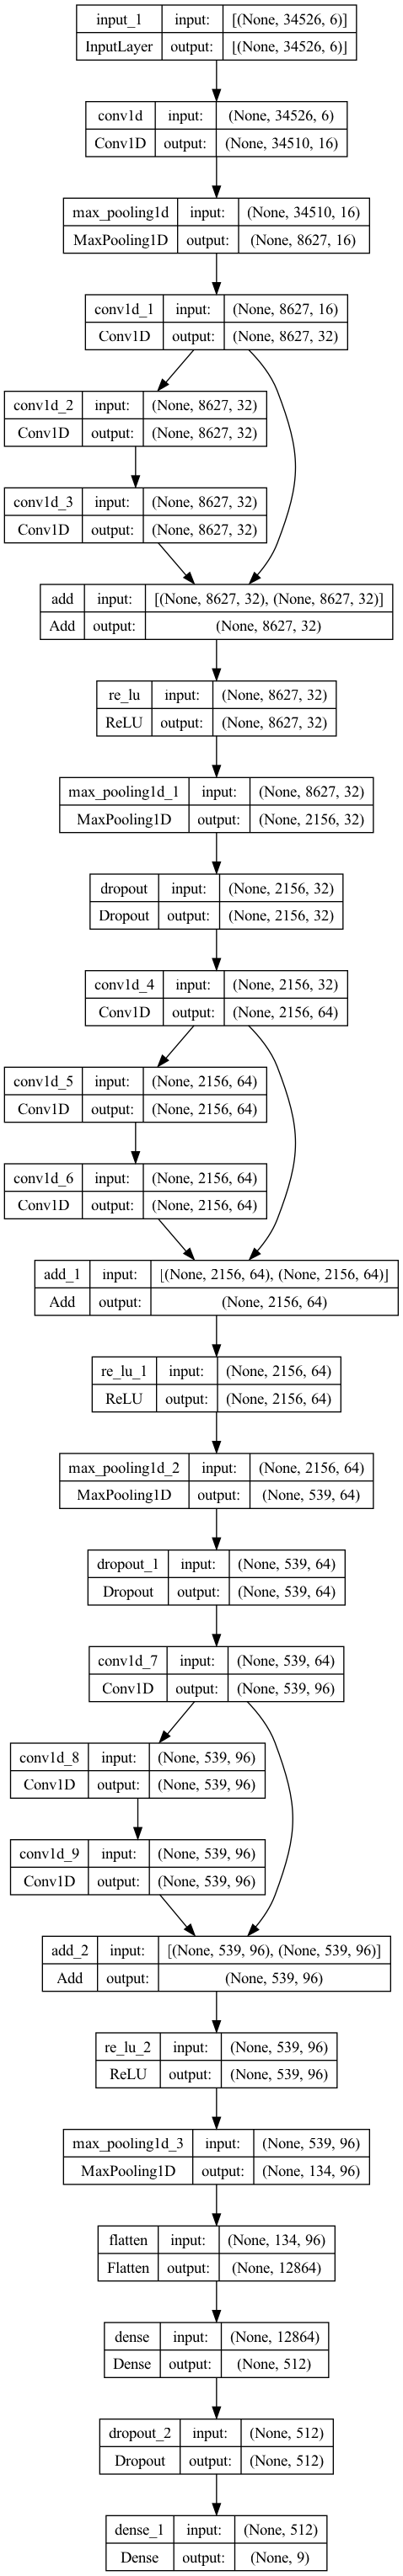

In [4]:
model = CNN(input_size=(max_seq_len, 6),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 34526, 6)]           0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 34510, 16)            1648      ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 8627, 16)             0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv1d_1 (Conv1D)           (None, 8627, 32)             544       ['max_pooling1d[0][0]']   

In [10]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train,
                                 callback=[EarlyStopping(monitor='loss', patience=2)])

Epoch 1/50
311/311 [==============================] - 95s 284ms/step - loss: 2.3451 - ERM: 0.0952 - KDEL: 0.0937 - LMA: 0.0127 - MITO: 0.0803 - NES: -4.0875e-04 - NIK: 0.0115 - NLS: 0.0171 - NUCP: 0.0371 - OMM: 0.0118 - val_loss: 2.1769 - val_ERM: 1.7738e-04 - val_KDEL: 0.0017 - val_LMA: 3.5841e-04 - val_MITO: 2.8702e-04 - val_NES: 0.0037 - val_NIK: 4.4796e-04 - val_NLS: -5.3131e-04 - val_NUCP: -4.8116e-04 - val_OMM: 0.0014
Epoch 2/50
311/311 [==============================] - 95s 288ms/step - loss: 2.1723 - ERM: 0.1990 - KDEL: 0.2187 - LMA: 0.0023 - MITO: 0.0758 - NES: 0.0363 - NIK: 0.0575 - NLS: 0.0626 - NUCP: 0.0737 - OMM: 0.0365 - val_loss: 2.1780 - val_ERM: 0.0054 - val_KDEL: 0.0091 - val_LMA: -8.7238e-04 - val_MITO: 0.0022 - val_NES: 0.0063 - val_NIK: 0.0047 - val_NLS: -3.6383e-04 - val_NUCP: 0.0046 - val_OMM: 0.0078
Epoch 3/50
311/311 [==============================] - 95s 286ms/step - loss: 2.1710 - ERM: 0.2296 - KDEL: 0.2680 - LMA: 0.0105 - MITO: 0.1125 - NES: 0.0326 - NIK: 0.

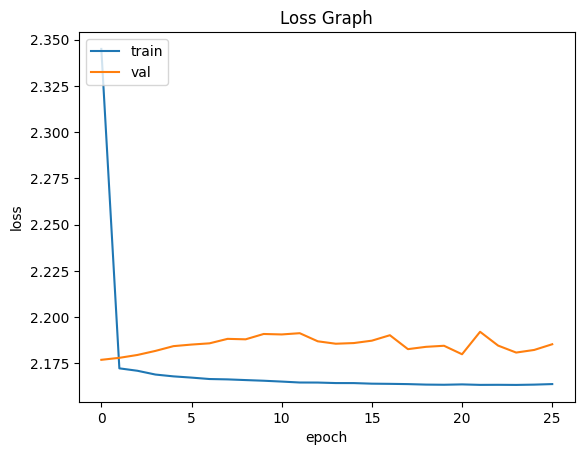

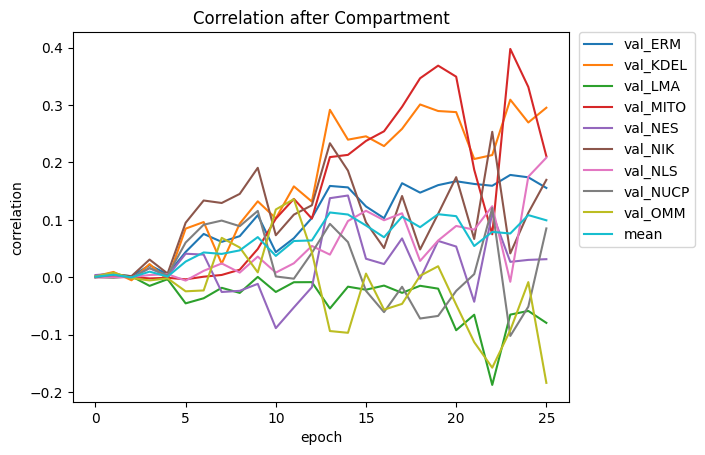

In [11]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

multiplot_pearson(history.history)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

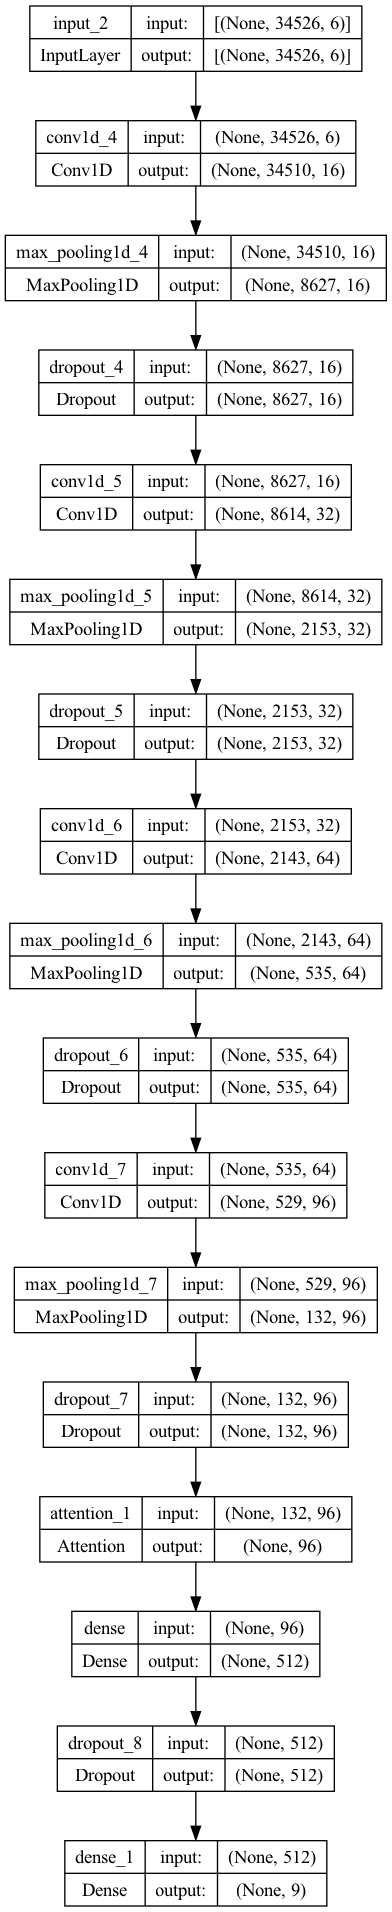

In [12]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)

In [13]:
model.save_model(model_output_path)